In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from skimage.external import tifffile
import seaborn as sns
from skimage.external.tifffile import imread
import os
from os import listdir
from os.path import isfile, join

In [2]:
bigDir=r'Z:\CookLab\Liu\DNAdamageAnalysis\20210110'

In [3]:
imageFolder=f'{bigDir}\\data_tiff'

In [4]:
dataFile=f'{bigDir}\\cellinfo_20210110_v9.csv'
data=pd.read_csv(dataFile)

# setting #2
- foci-results2
- result-image2

In [5]:
#data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'])
#data.to_csv(dataFile)

In [5]:
results=f'{bigDir}\\foci-results2'
images=f'{bigDir}\\result-image2-final'

In [7]:
for i,row in data.iterrows():
    ending=data.loc[i,'resultPath'].split('Results-')[1].split('.')[0]+'.tif'
    imagePath=f'{images}\\FociMask_45.0-{ending}'
    data.loc[i,'imagePath']=imagePath

In [8]:
#data.to_csv(dataFile)

In [6]:
data.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,movie,ID,x,y,molecular_age,category,...,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath,imagePath
0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,11.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,22.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,16.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,7.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,24.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...


In [26]:
for i, row in data.iterrows():
    newSegFolder = os.path.dirname(row.path.replace('data_tiff','result-image2-final//nuc_total_foci'))
    try:
        os.mkdir(newSegFolder)
    except:
        pass
    reMask=imread(data.loc[i,'imagePath'])
    img=imread(data.loc[i,'path'].replace('data_tiff','masked_image').replace('.tif','_masked.tif'))
    
    reMask[reMask==255]=1
    reMask=reMask.astype(bool)
    img[~reMask]=0
    
    imgFile = os.path.basename(row.path).replace('.tif',f'_nuc_total_foci.tif')
    tifffile.imsave(os.path.join(newSegFolder,imgFile), img.astype('uint8'))    

In [49]:
for i, row in data.iterrows():
    newSegFolder = os.path.dirname(row.path.replace('data_tiff','result-image2-final//eu_foci'))
    newSeg1Folder=os.path.dirname(row.path.replace('data_tiff','result-image2-final//het_foci'))
    
    try:
        os.mkdir(newSegFolder)
        os.mkdir(newSeg1Folder)
    except:
        pass
    
    foci=imread(data.loc[i,'imagePath'])
    img=imread(data.loc[i,'path'].replace('data_tiff','masked_image').replace('.tif','_masked.tif'))
    het=imread(data.loc[i,'path'].replace('data_tiff','segmentation_20').replace('.tif','_hetChrom.tif'))
    eu=imread(data.loc[i,'path'].replace('data_tiff','segmentation_20_eu').replace('.tif','_euChrom.tif'))
    
    het=het.astype(bool)
    eu=eu.astype(bool)
    
    imHet=img.copy()
    imEu=img.copy()
    
    foci[foci==255]=1
    foci=foci.astype(bool)
    
    imHet[~het]=0
    imHet[~foci]=0
    imgFile = os.path.basename(row.path).replace('.tif',f'_het_foci.tif')
    tifffile.imsave(os.path.join(newSeg1Folder,imgFile), imHet.astype('uint8'))  
    
    imEu[~eu]=0
    imEu[~foci]=0
    imgFile = os.path.basename(row.path).replace('.tif',f'_eu_foci.tif')
    tifffile.imsave(os.path.join(newSegFolder,imgFile), img.astype('uint8'))       
    

In [41]:
for i, row in data.iterrows():
    try:
        result=pd.read_csv(data.loc[i,'resultPath'])
        data.intensity=data.intensity.astype('object')
        intensity=result.loc[:,'Intensity'].values.tolist()
        data.at[i,'intensity']=intensity
    except:
        data.at[i,'intensity']=[]

In [42]:
data.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,movie,ID,x,y,molecular_age,category,...,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath,imagePath,intensity
0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,11.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[25705.58, 21960.438, 15551.518, 14896.57, 139..."
1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,22.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[26105.709, 21349.041, 19728.039, 17971.768, 1..."
2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,16.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[19153.35, 18027.488, 17394.143, 16057.05, 160..."
3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,1292296373,965219561,4568050715,956651499,3611399216,d20210110,7.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[18837.4, 15755.615, 14266.773000000001, 11617..."
4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,1516125809,786686510,4183283806,849315778,3333968028,d20210110,24.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[21303.871, 21151.697, 17408.346, 16875.402, 1..."


In [45]:
CTL=data.loc[data.group=='CTL',:]

<IPython.core.display.Javascript object>


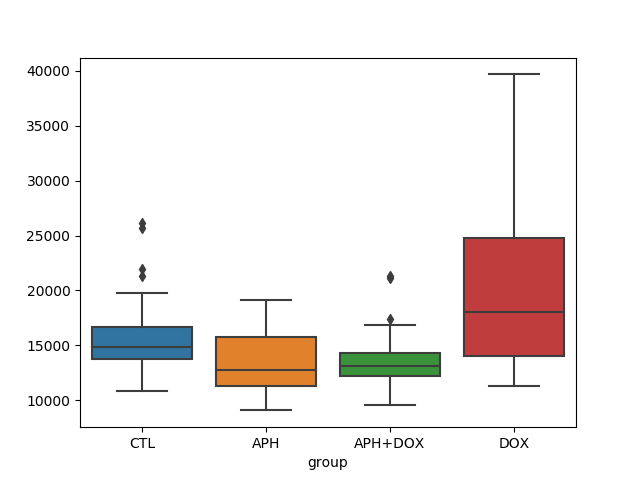

In [54]:
%matplotlib notebook
sns.boxplot(data=data,x='group',y=np.sum(data.intensity))

# setting #2-2
- foci-results2-2
- result-image2-2-final

In [55]:
data.head()

,file,original cell name,movie,ID,x,y,molecular_age,category,group,ab1 (heterochromatin),...,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo
0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2354269459,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,10.0
1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2162395235,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,17.0
2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2441791517,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,10.0
3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2248947872,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,4.0
4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2365441587,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,22.0


In [56]:
dataFile=f'{bigDir}\\cellinfo_20210110_v9-2.csv'
data=pd.read_csv(dataFile)
#data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1'])
#data.to_csv(dataFile)

In [56]:
for i,row in data.iterrows():
    resultPath=data.loc[i,'path'].replace('data_tiff','foci-results2-2')
    resultPath=resultPath.replace('20210110_cell_','Results-')
    resultPath=resultPath.replace('.tif','.csv')
    data.loc[i,'resultPath']=resultPath

In [57]:
results=f'{bigDir}\\foci-results2-2'
images=f'{bigDir}\\result-image2-2-final'

In [58]:
for i,row in data.iterrows():
    ending=data.loc[i,'resultPath'].split('Results-')[1].split('.')[0]+'.tif'
    imagePath=f'{images}\\FociMask_45.0-{ending}'
    data.loc[i,'imagePath']=imagePath

In [59]:
#data.to_csv(dataFile)

In [60]:
data.head()

,file,original cell name,movie,ID,x,y,molecular_age,category,group,ab1 (heterochromatin),...,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath,imagePath
0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,10.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,17.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,10.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,4.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...
4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,HP1,...,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,22.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...


In [61]:
for i, row in data.iterrows():
    newSegFolder = os.path.dirname(row.path.replace('data_tiff','result-image2-2-final//nuc_total_foci'))
    try:
        os.mkdir(newSegFolder)
    except:
        pass
    reMask=imread(data.loc[i,'imagePath'])
    img=imread(data.loc[i,'path'].replace('data_tiff','masked_image').replace('.tif','_masked.tif'))
    
    reMask[reMask==255]=1
    reMask=reMask.astype(bool)
    img[~reMask]=0
    
    imgFile = os.path.basename(row.path).replace('.tif',f'_nuc_total_foci.tif')
    tifffile.imsave(os.path.join(newSegFolder,imgFile), img.astype('uint8'))    

In [62]:
for i, row in data.iterrows():
    newSegFolder = os.path.dirname(row.path.replace('data_tiff','result-image2-2-final//eu_foci'))
    newSeg1Folder=os.path.dirname(row.path.replace('data_tiff','result-image2-2-final//het_foci'))
    
    try:
        os.mkdir(newSegFolder)
        os.mkdir(newSeg1Folder)
    except:
        pass
    
    foci=imread(data.loc[i,'imagePath'])
    img=imread(data.loc[i,'path'].replace('data_tiff','masked_image').replace('.tif','_masked.tif'))
    het=imread(data.loc[i,'path'].replace('data_tiff','segmentation_20').replace('.tif','_hetChrom.tif'))
    eu=imread(data.loc[i,'path'].replace('data_tiff','segmentation_20_eu').replace('.tif','_euChrom.tif'))
    
    het=het.astype(bool)
    eu=eu.astype(bool)
    
    imHet=img.copy()
    imEu=img.copy()
    
    foci[foci==255]=1
    foci=foci.astype(bool)
    
    imHet[~het]=0
    imHet[~foci]=0
    imgFile = os.path.basename(row.path).replace('.tif',f'_het_foci.tif')
    tifffile.imsave(os.path.join(newSeg1Folder,imgFile), imHet.astype('uint8'))  
    
    imEu[~eu]=0
    imEu[~foci]=0
    imgFile = os.path.basename(row.path).replace('.tif',f'_eu_foci.tif')
    tifffile.imsave(os.path.join(newSegFolder,imgFile), img.astype('uint8'))       
    

In [59]:
for i, row in data.iterrows():
    data.intensity=data.intensity.astype('object')
    try:
        result=pd.read_csv(data.loc[i,'resultPath'])
        intensity=result.loc[:,'Intensity'].values.tolist()
        data.at[i,'intensity']=intensity
    except:
        data.at[i,'intensity']=[]

In [60]:
data.head()

,Unnamed: 0,file,original cell name,movie,ID,x,y,molecular_age,category,group,...,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath,imagePath,intensity
0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,...,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,10.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[24981.678, 15239.382, 14622.999, 13655.482, 1..."
1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,...,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,17.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[25673.433999999997, 21013.611, 18903.186, 177..."
2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,...,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,10.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[18830.801, 17424.084, 15697.36, 15909.876, 15..."
3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,...,1292296373,965219561,4568050715,956651499,3611399216,d20210110,4.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[18326.084, 15378.716999999999, 13846.001, 104..."
4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,CTL,...,1516125809,786686510,4183283806,849315778,3333968028,d20210110,22.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\resu...,"[20690.23, 20545.593999999997, 16970.414, 1527..."


In [61]:
CTL=data.loc[data.group=='CTL',:]

<IPython.core.display.Javascript object>


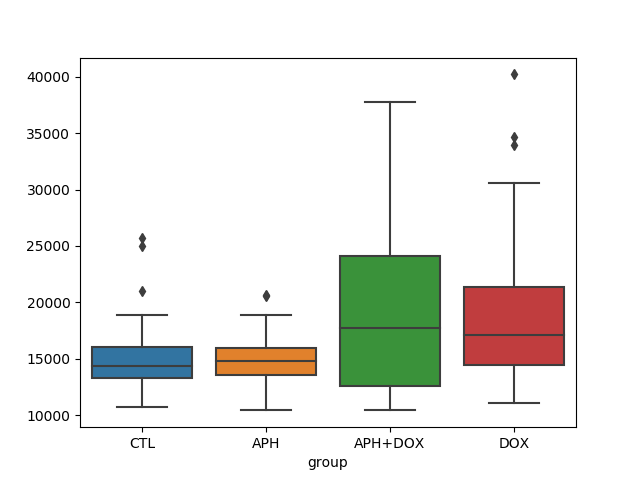

In [62]:
%matplotlib notebook
sns.boxplot(data=data,x='group',y=np.sum(data.intensity))